#Team Members

Yomna Tarek Abdullah
01096650883
Yomna.Soliman18@gmail.com

Dina
01223541880
Dinabil@outlook.com

Ann
01223435488
Ann_ahmedhussien@yahoo.com

# Classification Tasks

In [1]:
#Run ONCE
from google.colab import drive
drive.mount('/content/drivr')

Mounted at /content/drivr


In [2]:
#Run ONCE
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   152M      0  0:00:05  0:00:05 --:--:--  160M


In [3]:
#Run ONCE
import zipfile
!unzip -q kagglecatsanddogs_3367a.zip  ## unzip the downloaded data

In [4]:
#DEFINITION
import io
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense


In [5]:


# load the model
model = VGG16()
# load an image from file
image1 = load_img("/content/PetImages/Cat/10006.jpg", target_size=(224, 224))
# convert the image pixels to a numpy array
image1 = img_to_array(image1)
# reshape data for the model
image1 = image1.reshape((1, image1.shape[0], image1.shape[1], image1.shape[2]))
# prepare the image for the VGG model
image1 = preprocess_input(image1)
# predict the probability across all output classes
yhat = model.predict(image1)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


49152/35363 [=========================================] - 0s 0us/step
tabby (66.82%)


In [6]:
# load an image from file
image2 = load_img("/content/PetImages/Cat/10009.jpg", target_size=(224, 224))
# convert the image pixels to a numpy array
image2 = img_to_array(image2)
# reshape data for the model
image2 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
# prepare the image for the VGG model
image2 = preprocess_input(image2)
# predict the probability across all output classes
yhat = model.predict(image2)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Persian_cat (40.89%)


In [7]:
# load an image from file
image3 = load_img("/content/PetImages/Cat/1.jpg", target_size=(224, 224))
# convert the image pixels to a numpy array
image3 = img_to_array(image3)
# reshape data for the model
image3 = image3.reshape((1, image3.shape[0], image3.shape[1], image3.shape[2]))
# prepare the image for the VGG model
image3 = preprocess_input(image3)
# predict the probability across all output classes
yhat = model.predict(image3)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

tabby (44.72%)


# Filters Visualization

In [8]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [9]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

In [10]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

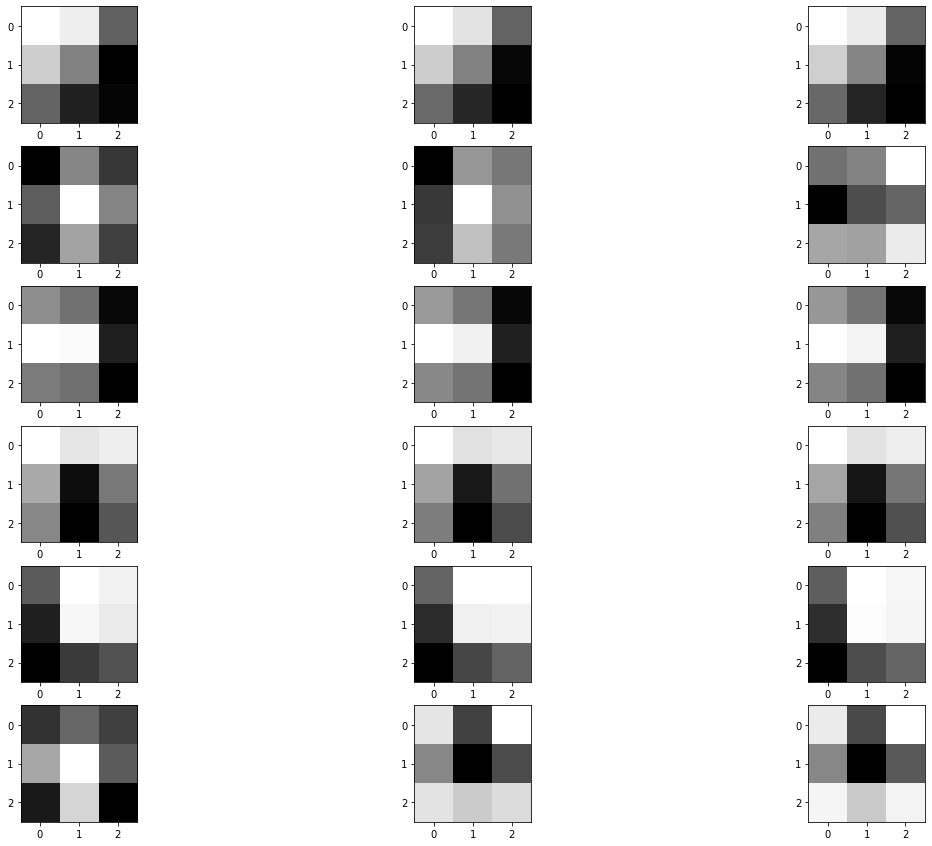

In [11]:
#We will be visualising 6 filters out of 64 filters from 1st layer.
n_filters =6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
pyplot.show()

In [12]:
#we need a clearer idea of the shape of the feature maps output by each of the convolutional layers 
#and the layer index number so that we can retrieve the appropriate layer output.

for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [13]:
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

Image 1

In [14]:
image = load_img("/content/PetImages/Cat/10006.jpg" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)
#The pixel values then need to be scaled appropriately for the VGG model.

image = preprocess_input(image)

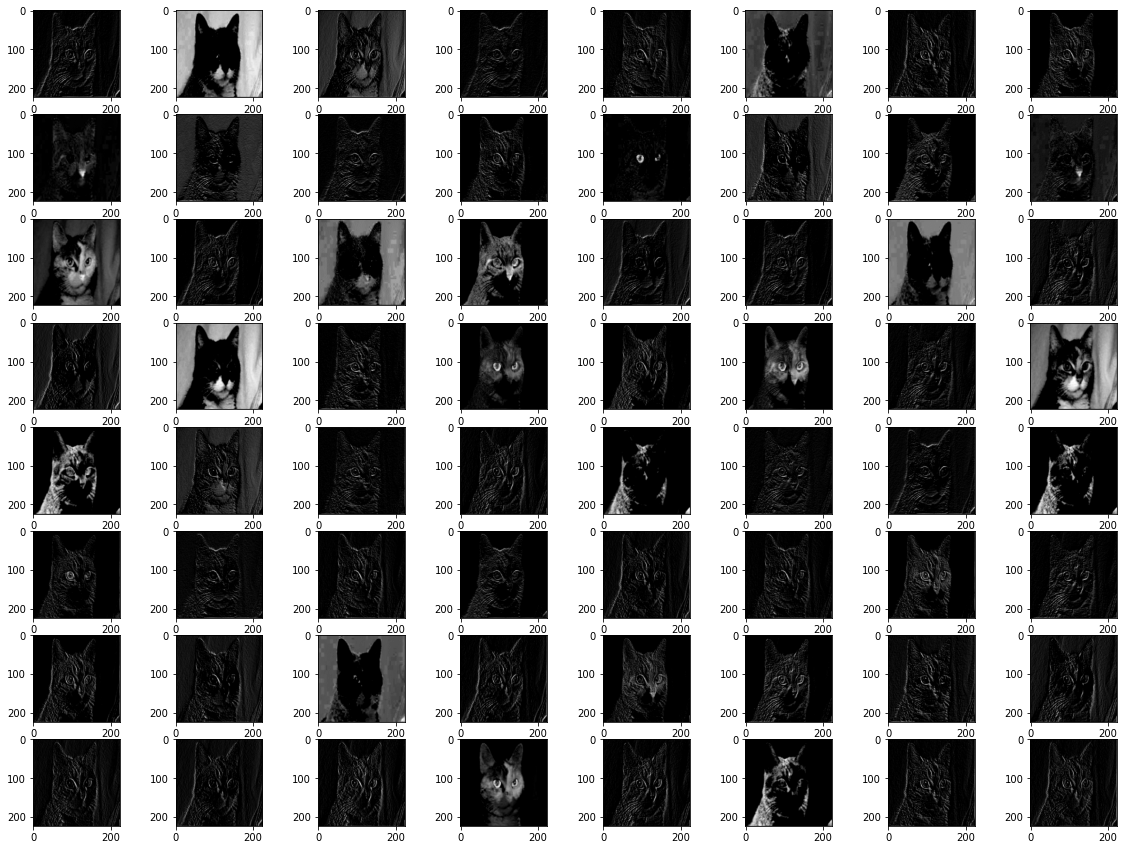

In [15]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

In [16]:
#Now we will visualise features of other layers.

model2 = VGG16()

In [17]:
blocks = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in blocks]

model2 = Model( inputs= model2.inputs, outputs = outputs)

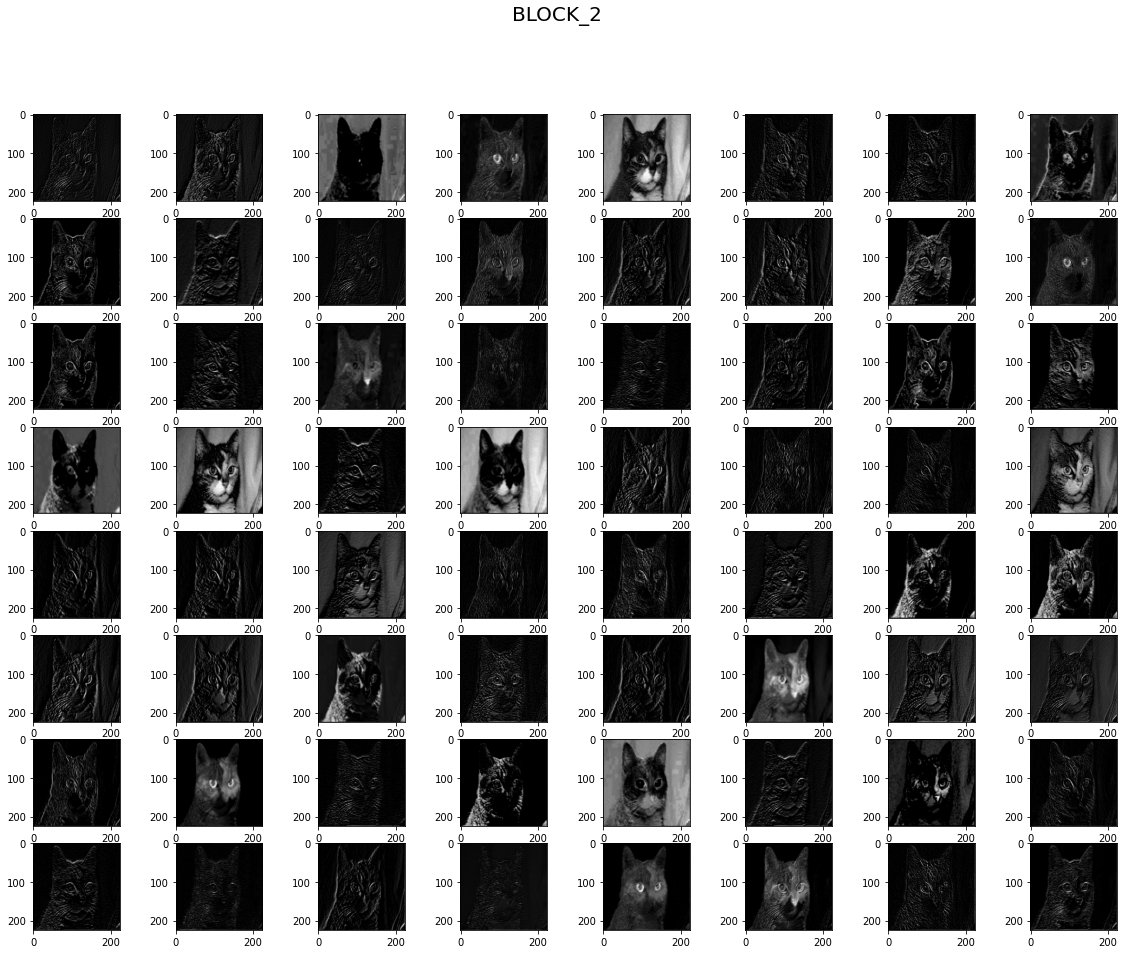

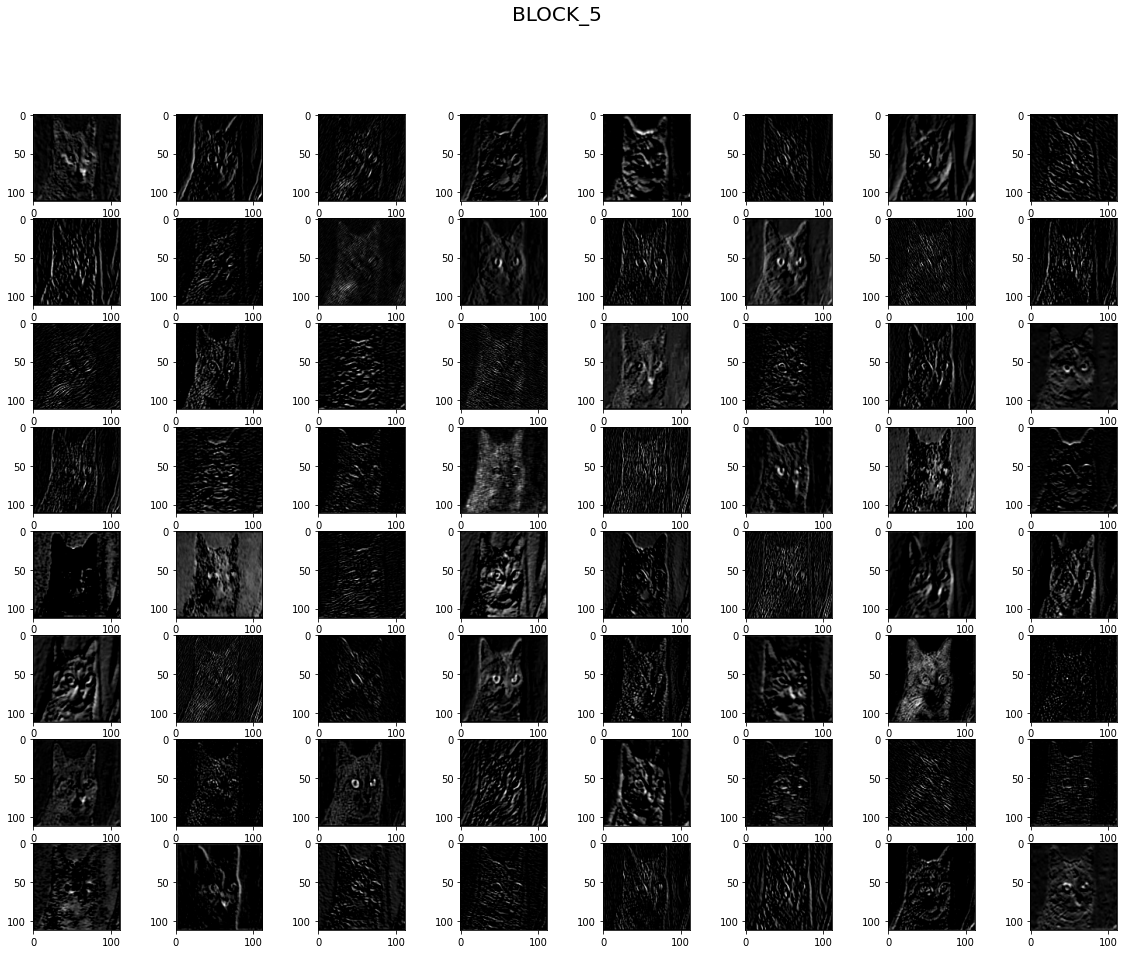

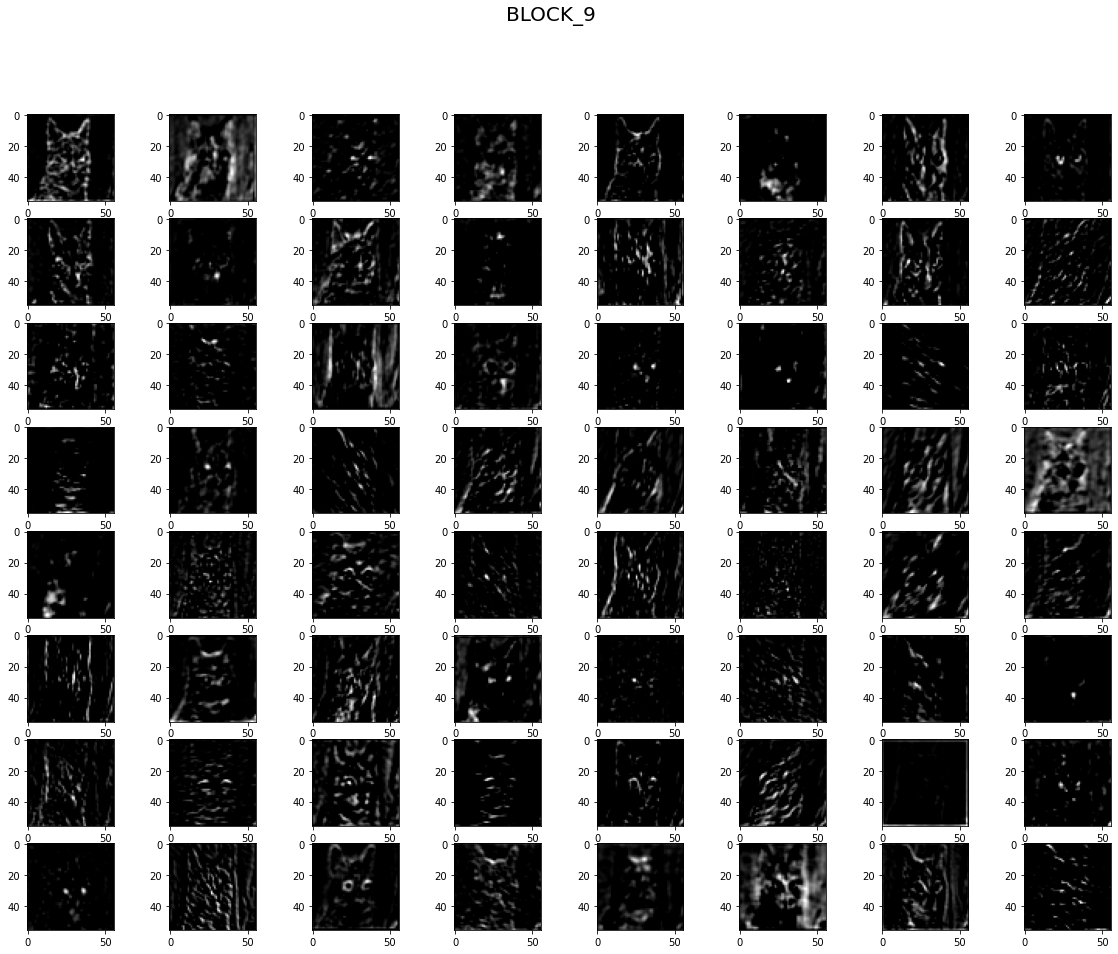

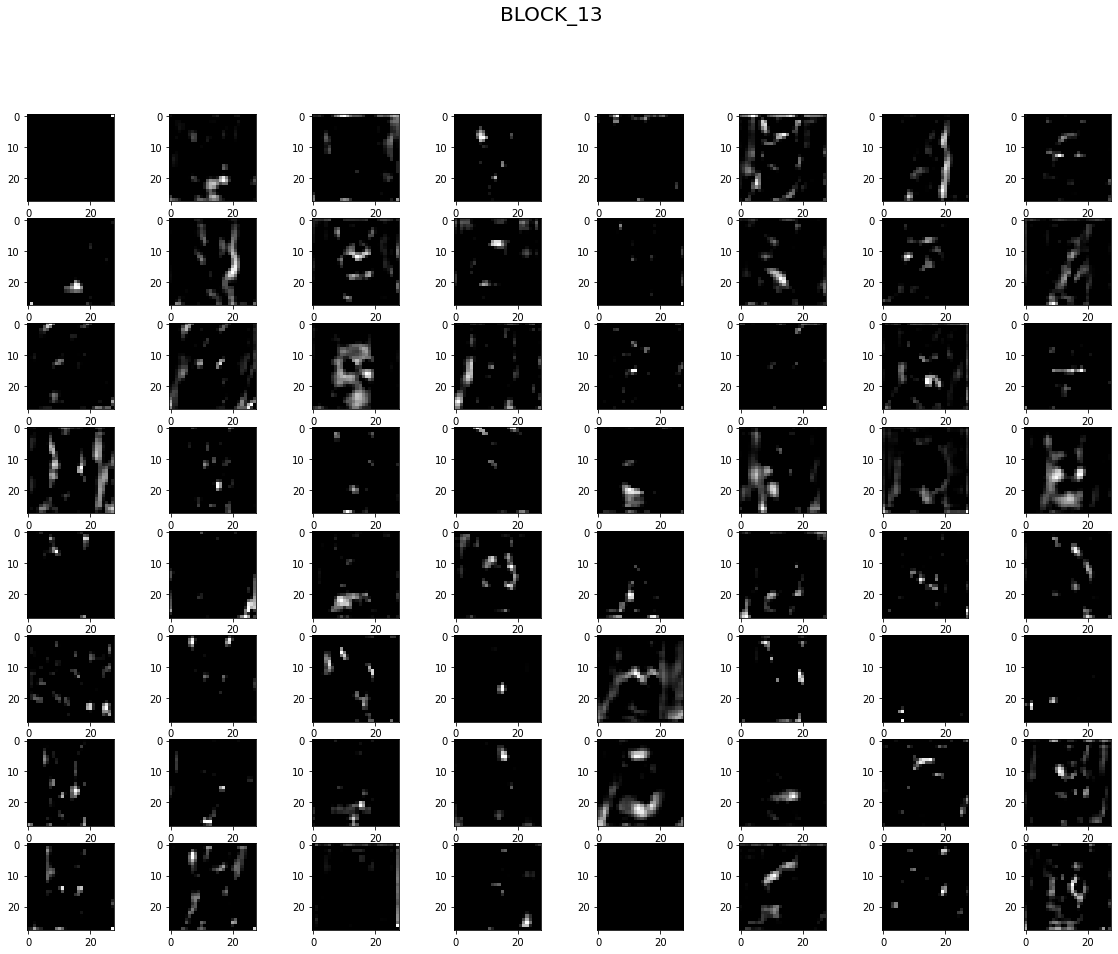

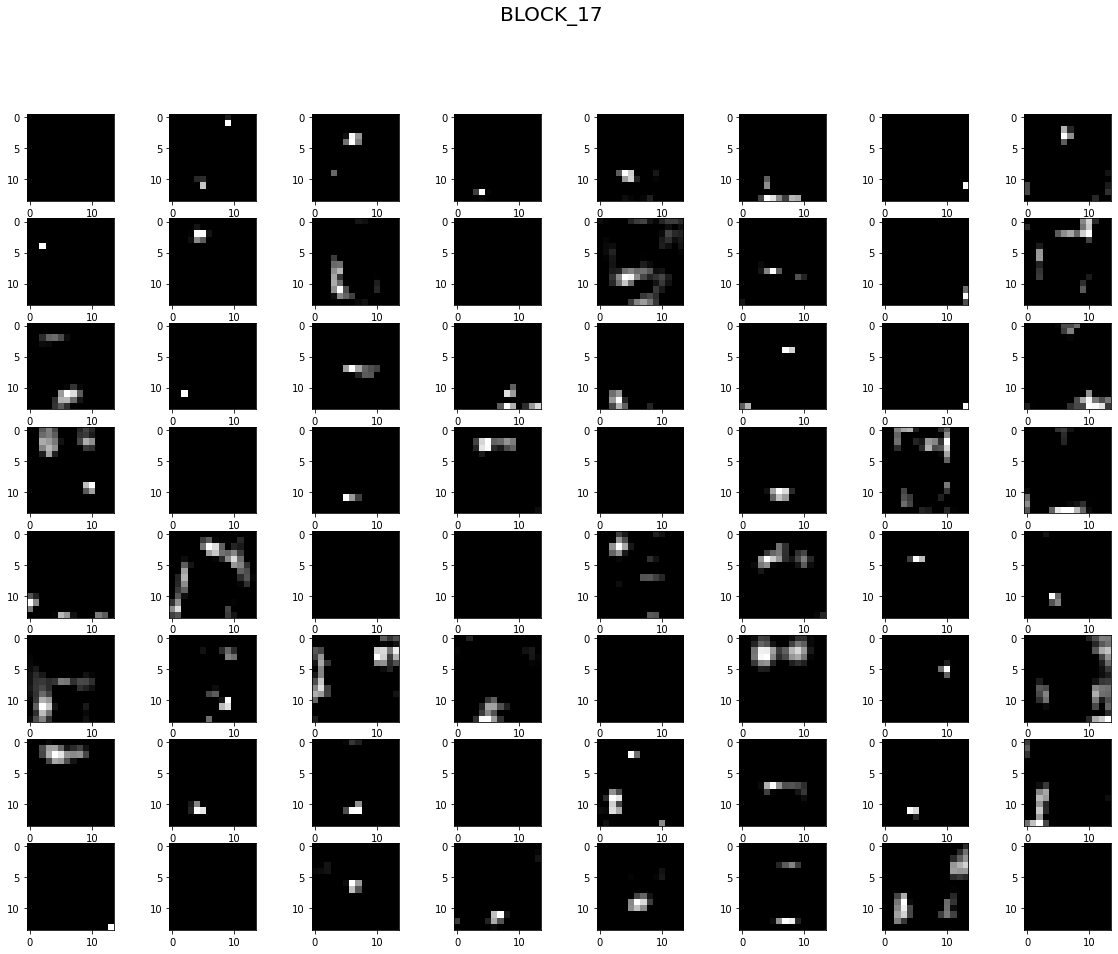

In [18]:
feature_map = model2.predict(image)

for i,fmap in zip(blocks,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    #https://stackoverflow.com/a/12444777
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

Image2


In [19]:
image = load_img("/content/PetImages/Cat/10009.jpg" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)
#The pixel values then need to be scaled appropriately for the VGG model.

image = preprocess_input(image)

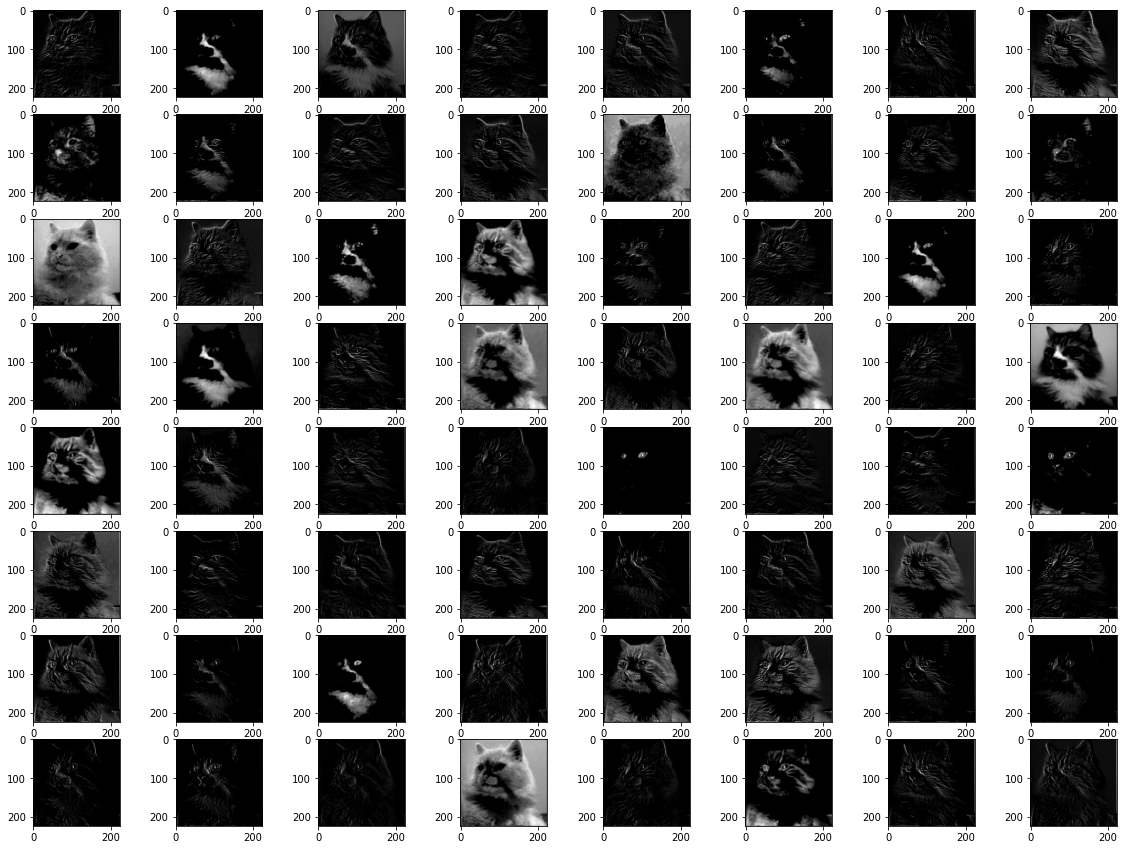

In [20]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

In [21]:
#Now we will visualise features of other layers.

model2 = VGG16()

In [22]:
blocks = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in blocks]

model2 = Model( inputs= model2.inputs, outputs = outputs)

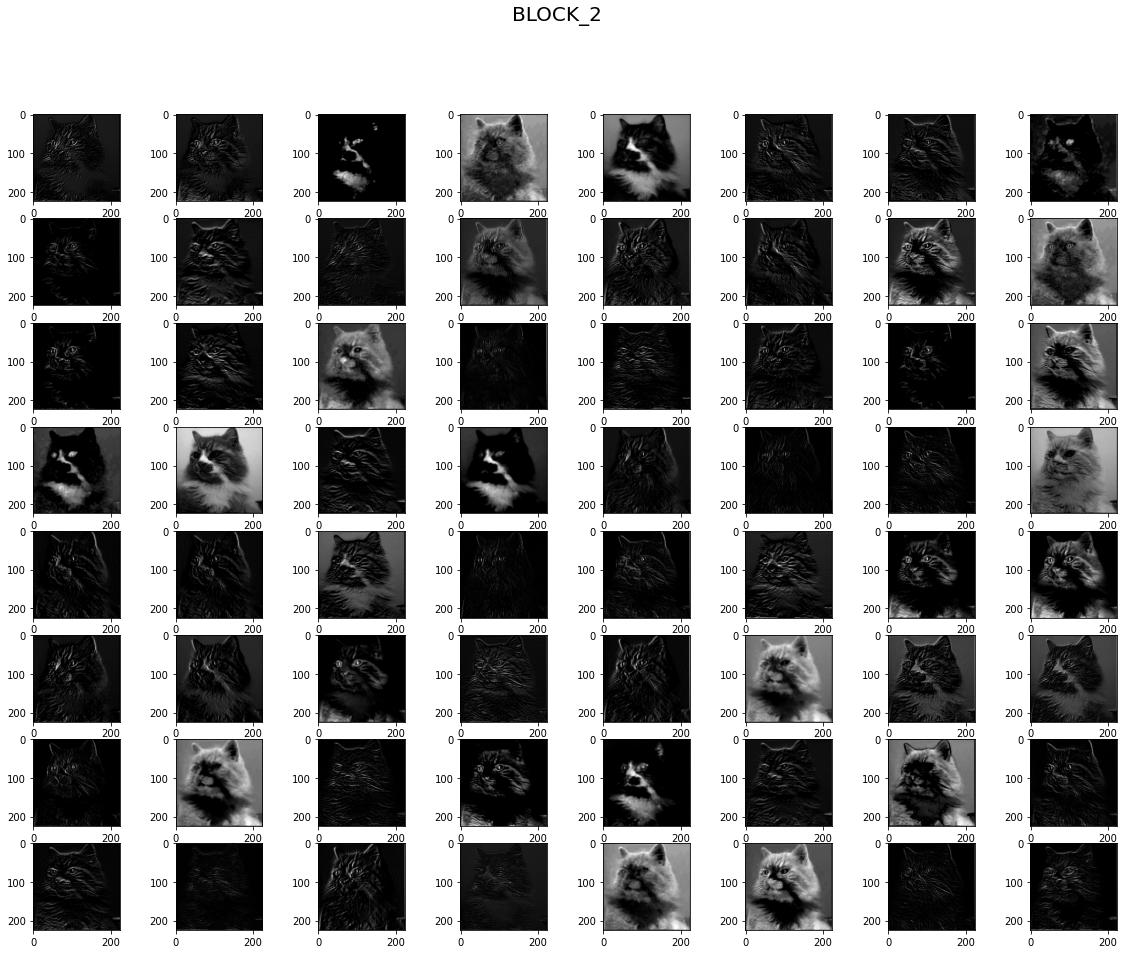

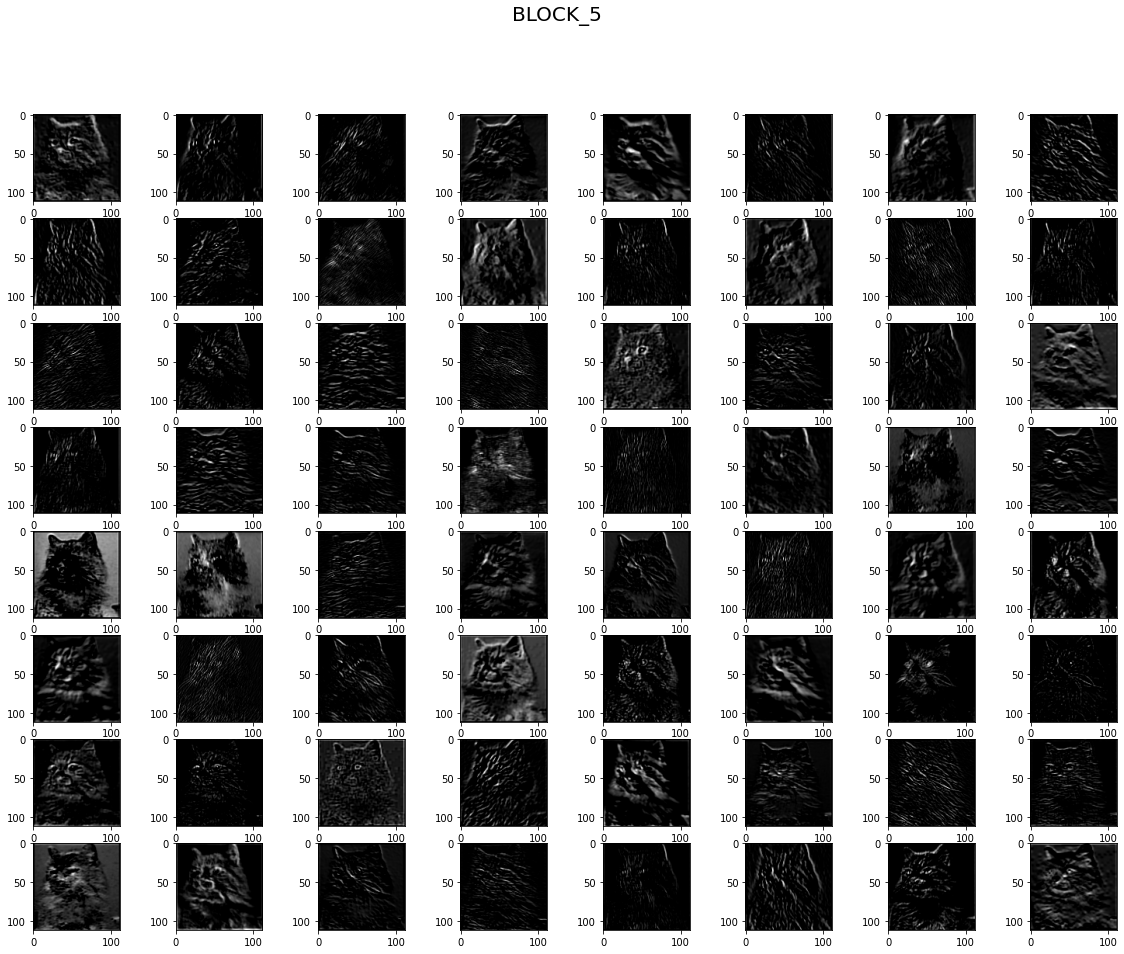

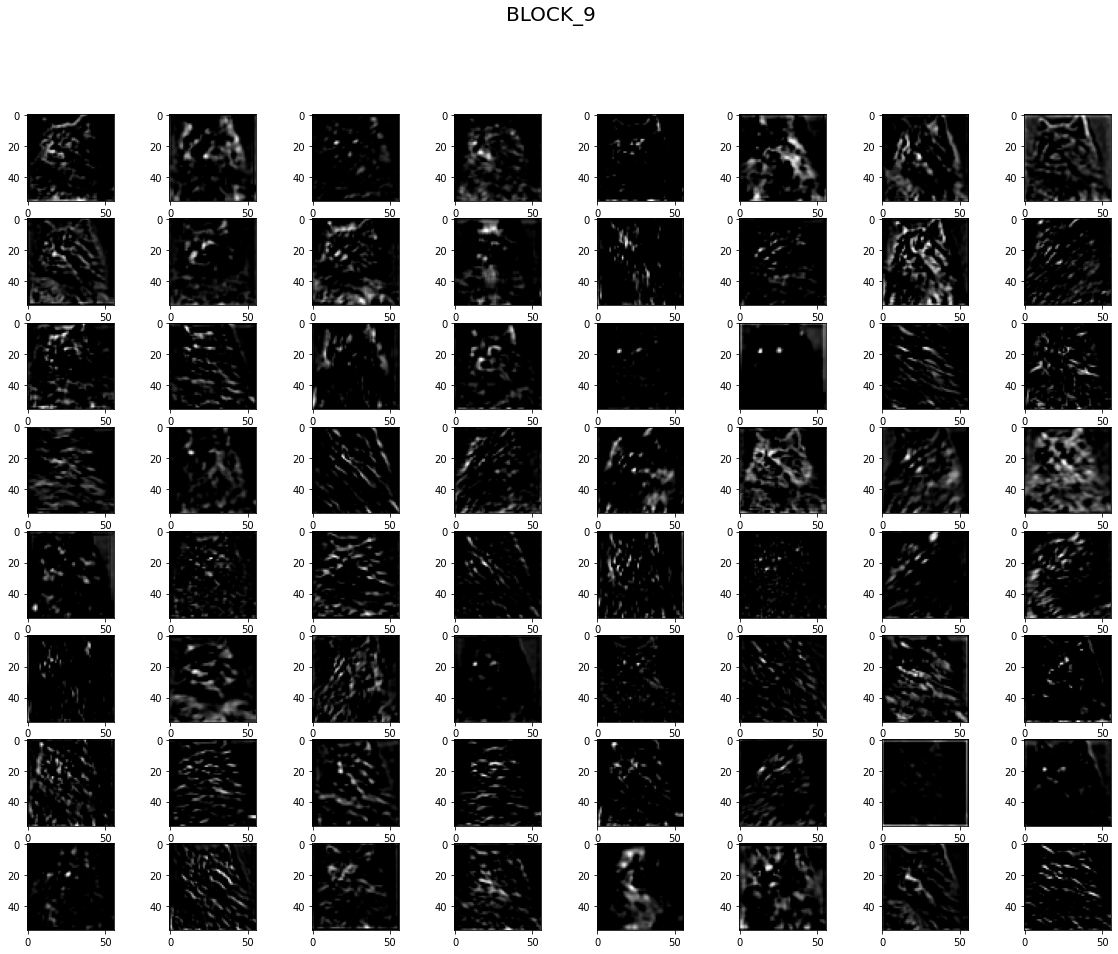

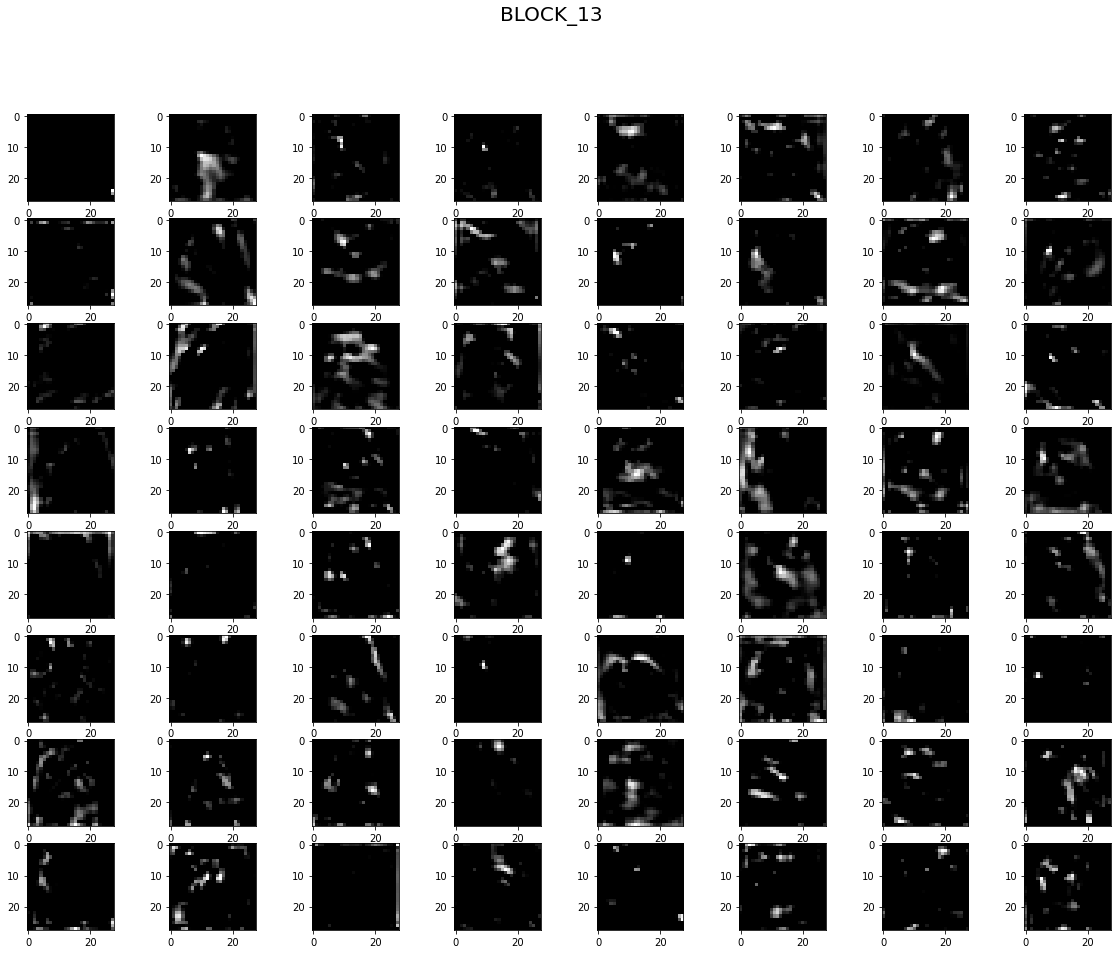

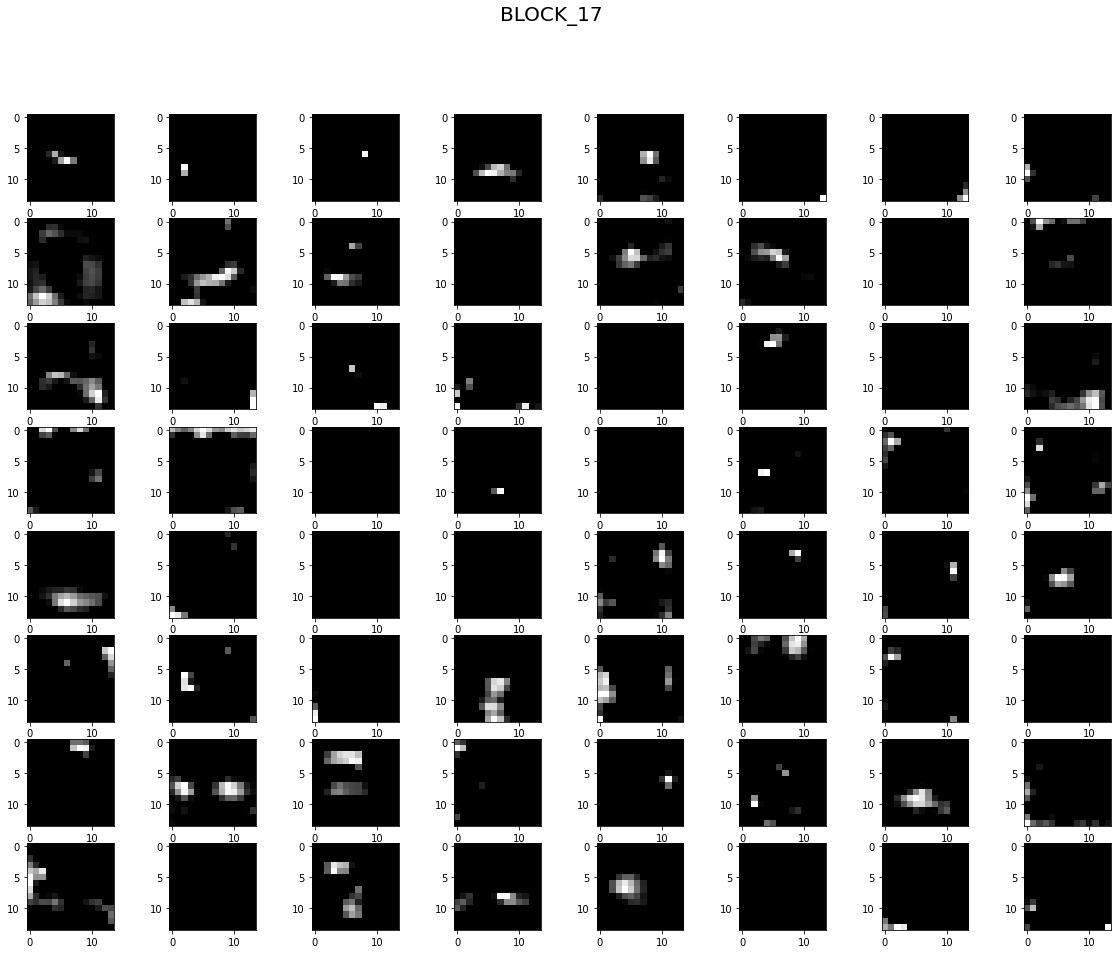

In [23]:
feature_map = model2.predict(image)

for i,fmap in zip(blocks,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    #https://stackoverflow.com/a/12444777
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

Image 3

In [24]:
image = load_img("/content/PetImages/Cat/1.jpg" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)
#The pixel values then need to be scaled appropriately for the VGG model.

image = preprocess_input(image)

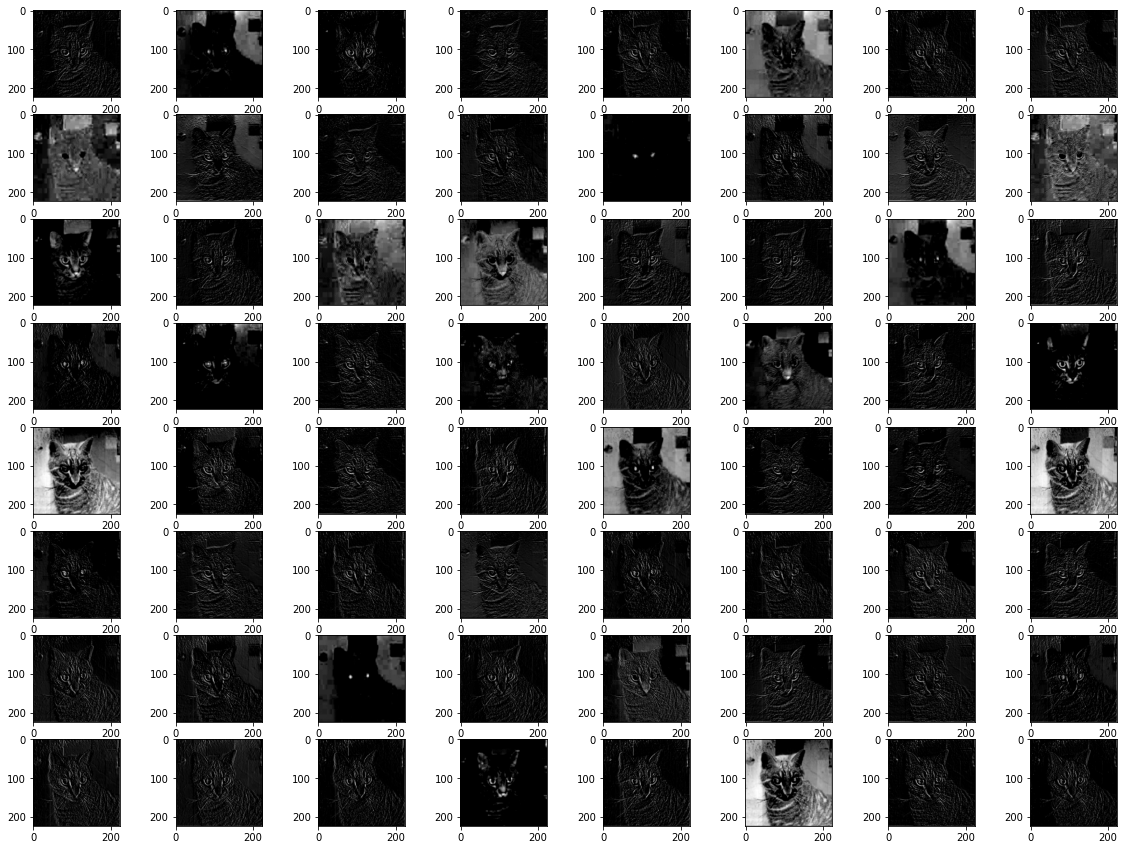

In [25]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

In [26]:
#Now we will visualise features of other layers.

model2 = VGG16()

In [27]:
blocks = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in blocks]

model2 = Model( inputs= model2.inputs, outputs = outputs)

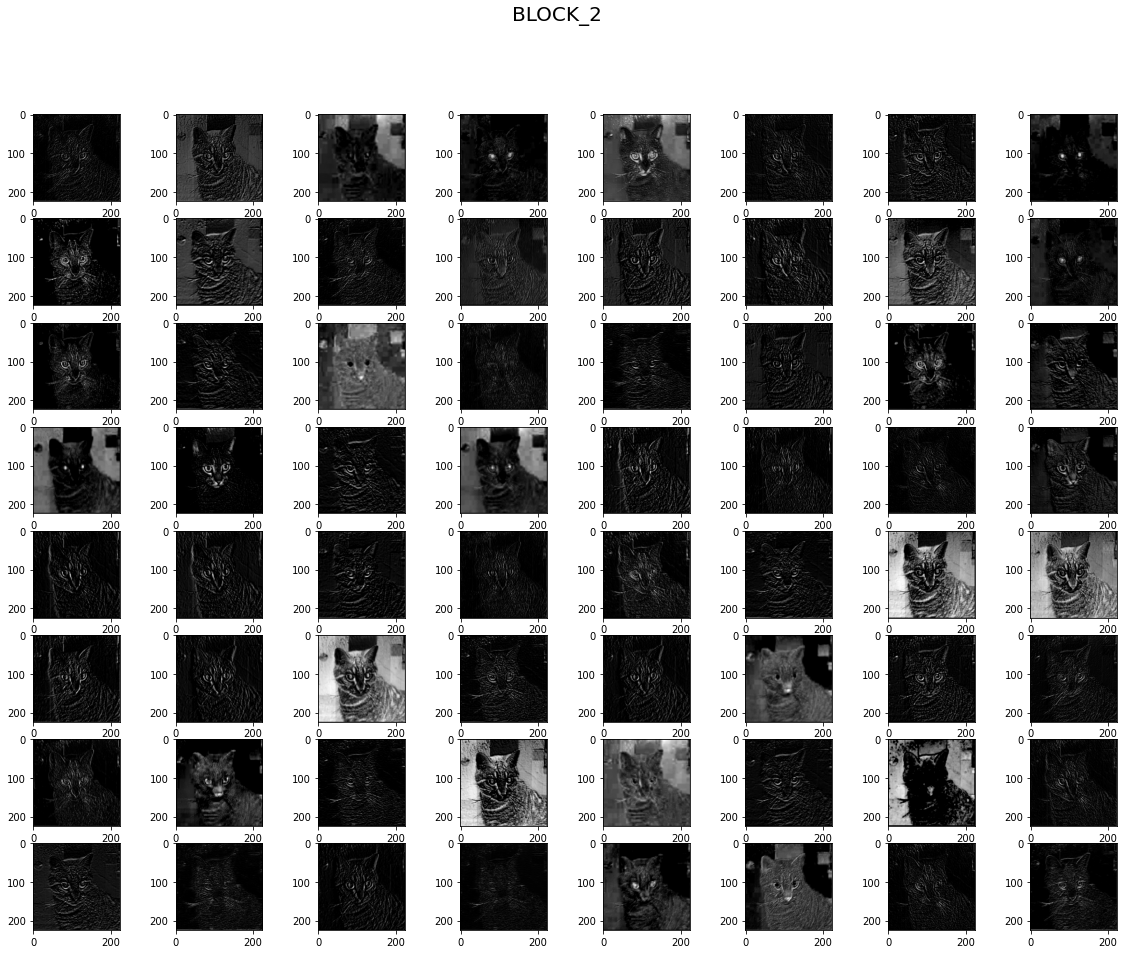

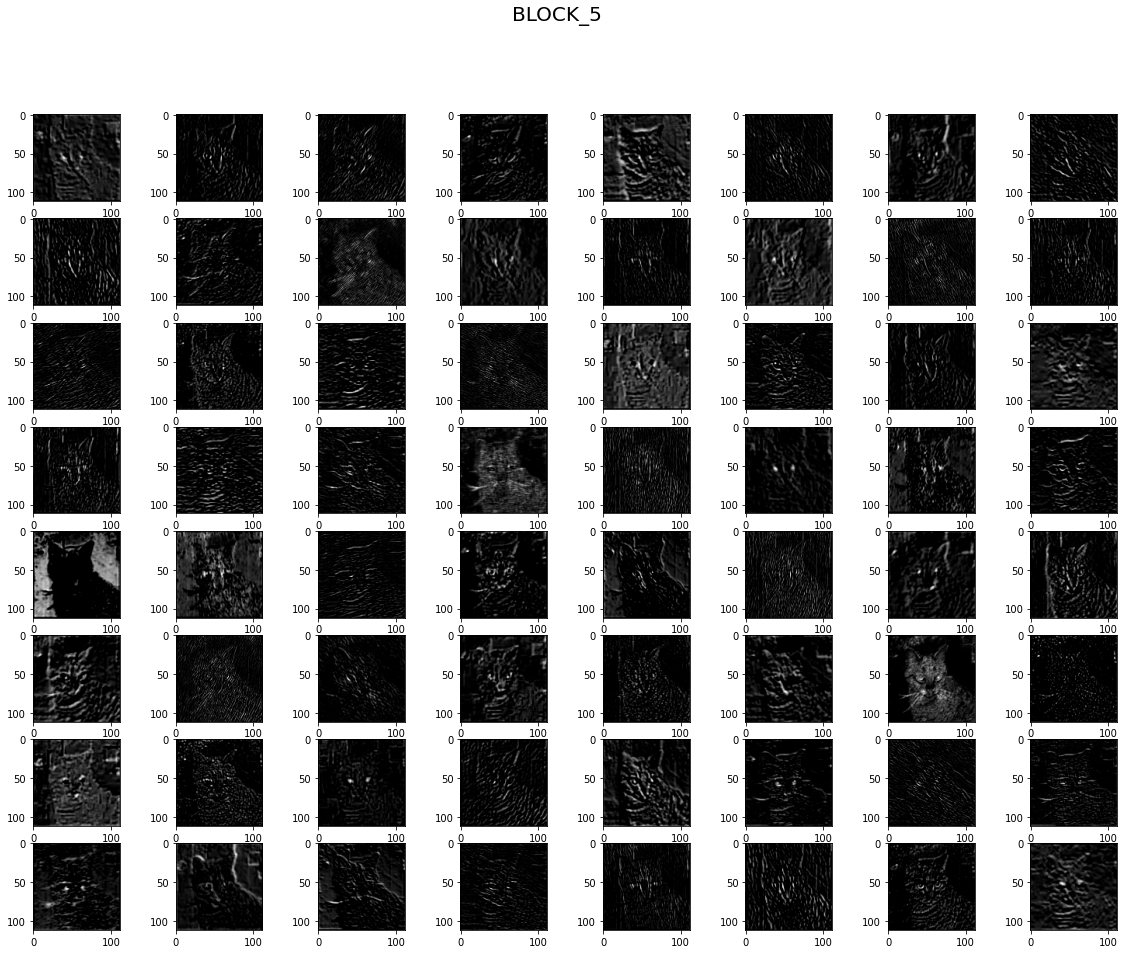

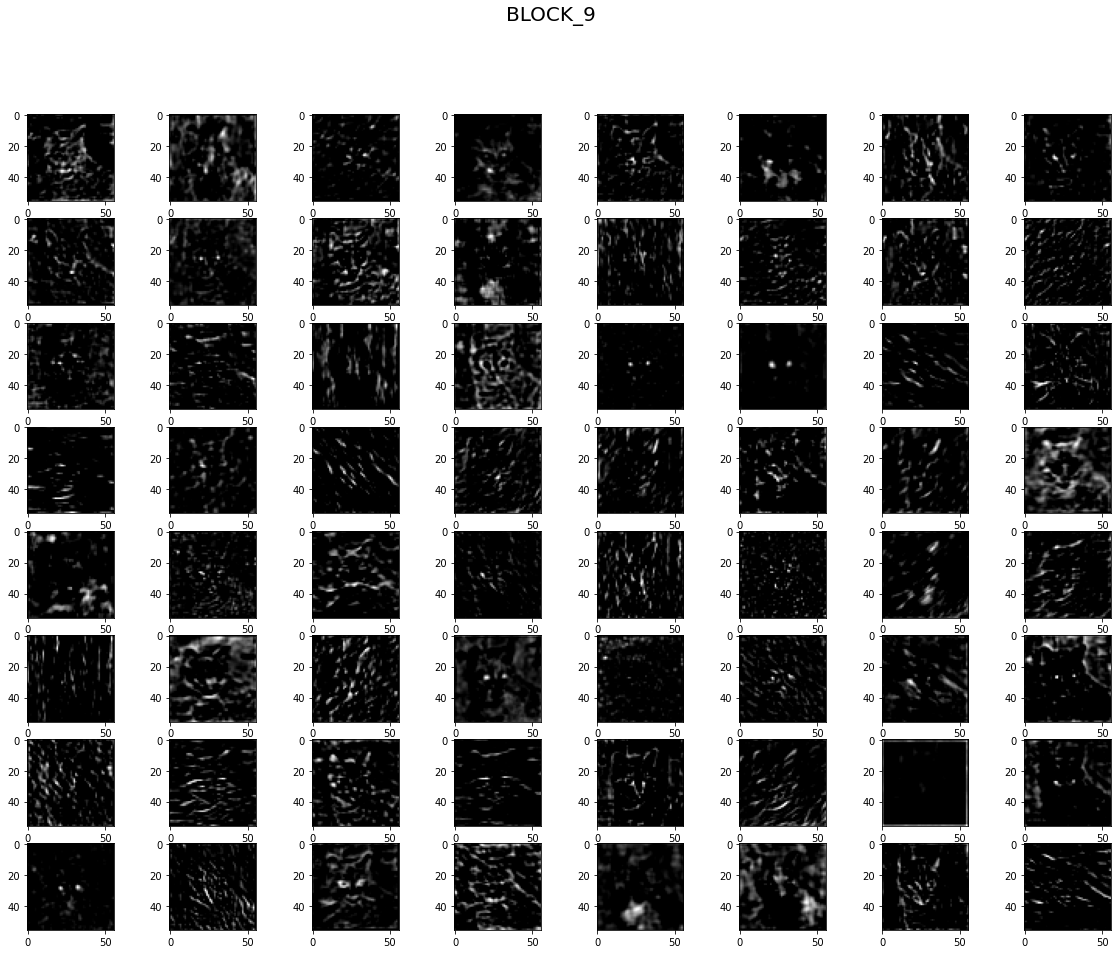

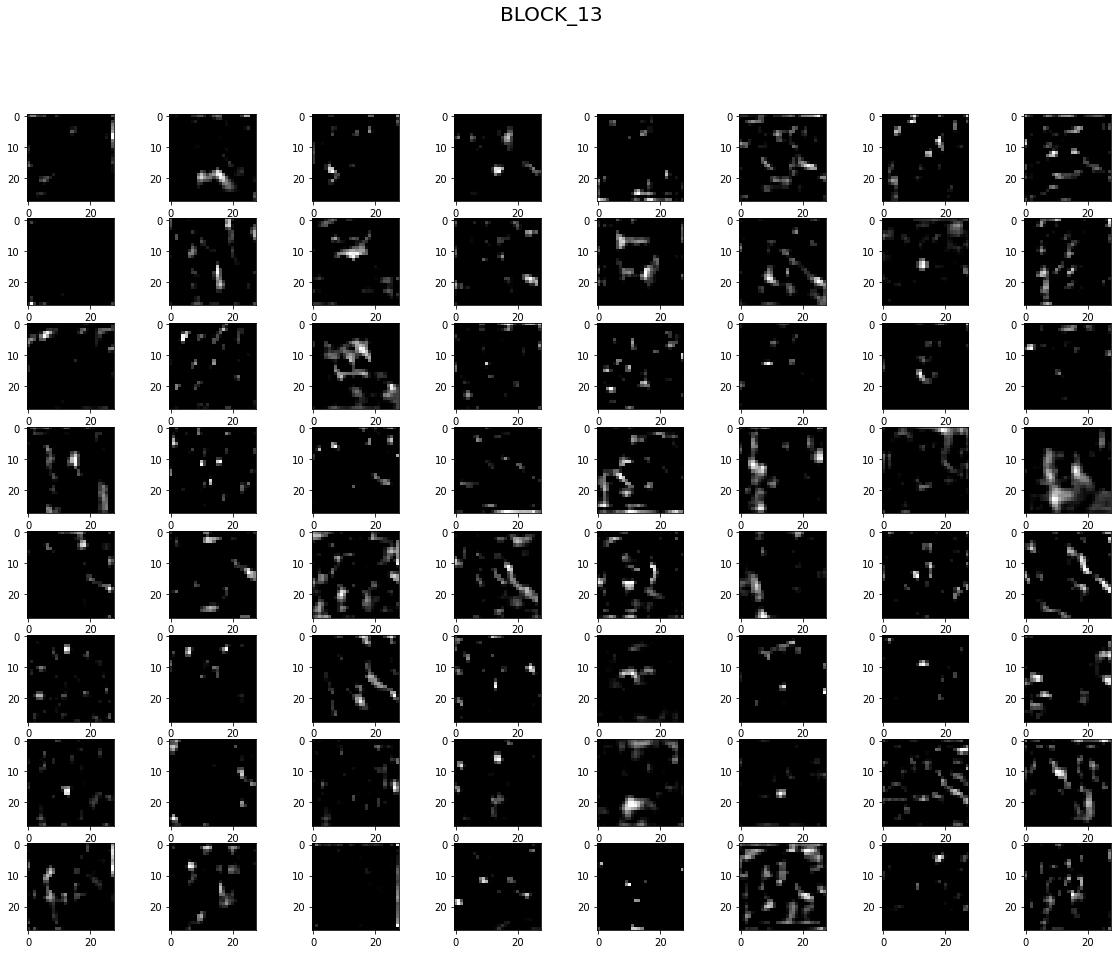

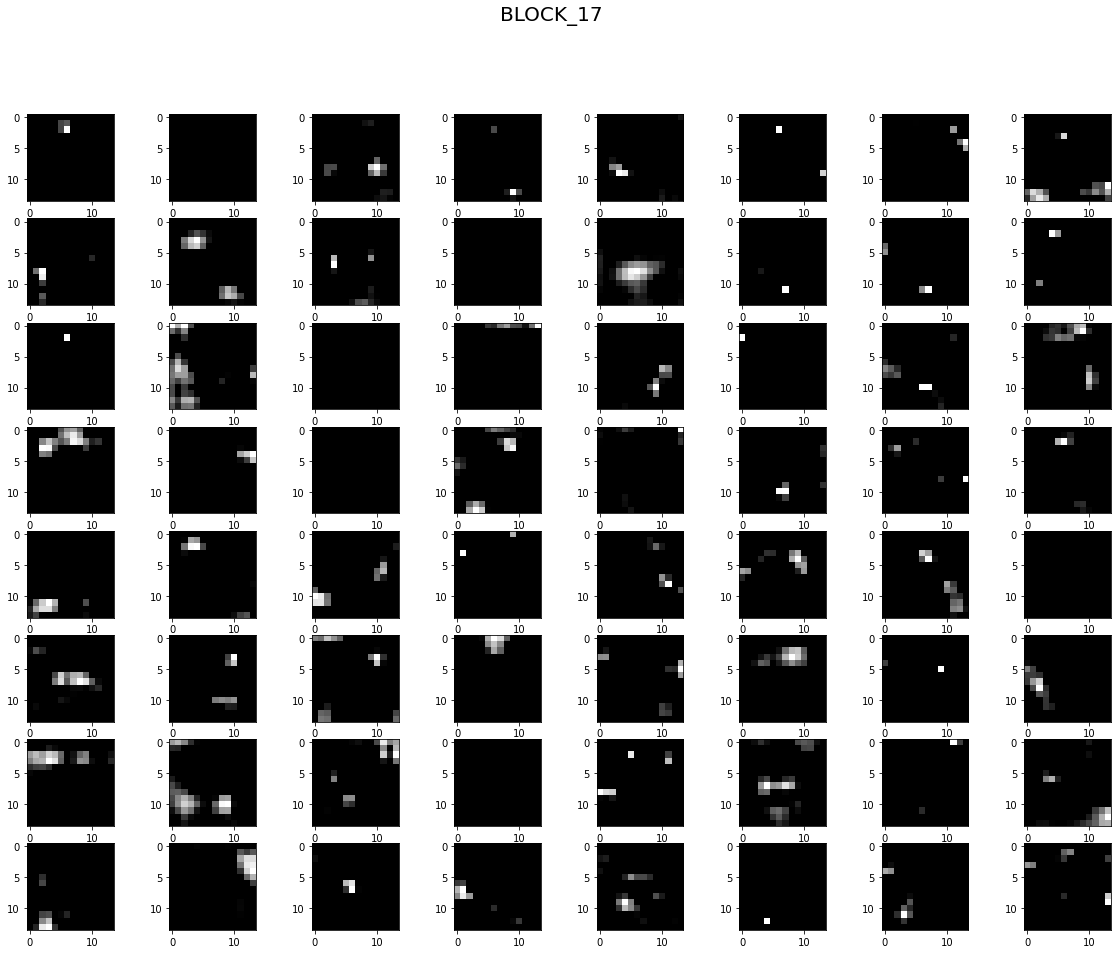

In [28]:
feature_map = model2.predict(image)

for i,fmap in zip(blocks,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    #https://stackoverflow.com/a/12444777
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
pyplot.show()